-----------------
Got these results from a bunch of classifiers and this is to analyse them.
-----------------

The csv data that was fed to the classifiers was "compression features" from the D'avino dataset (by my CNNs).

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [39]:
df = pd.read_csv('output_all_Davino_individually.csv')
df = df.sort_values(by=["File", "data", "classifier", "balancing"], ascending=True)
df = df.groupby(["File", "data", "classifier", "balancing"], as_index=False).mean()
df = df.drop('stratification', 1)


#df['num tampered'] = df['TP'] + df ['FN']
#df['num auth'] = df['TN'] + df['FP']
df['imb ratio'] = (df['TP'] + df ['FN'])/(df['TN'] + df['FP'])

df['f1 (auth)'] = 2 * df["TN"] / ((2*df["TN"]) + df["FP"] + df["FN"])
df['f1 (tamp)'] = 2 * df["TP"] / ((2*df["TP"]) + df["FN"] + df["FP"])
df['f1 mine'] = (2 * df['f1 (tamp)']) + df['f1 (auth)']

# and now, "get rid" of stratification



df.head(5)

,File,data,classifier,balancing,TN,FP,FN,TP,accuracy,total f1,imb ratio,f1 (auth),f1 (tamp),f1 mine
0,01_TANK_f,d_i_k_q_,NB,-,762.75,8484.25,0.0,503.0,0.129821,0.233035,0.054396,0.152401,0.106004,0.364408
1,01_TANK_f,d_i_k_q_,NB,ro,762.75,8484.25,0.0,503.0,0.129821,0.233035,0.054396,0.152401,0.106004,0.364408
2,01_TANK_f,d_i_k_q_,NB,ru,762.75,8484.25,0.0,503.0,0.129821,0.233035,0.054396,0.152401,0.106004,0.364408
3,01_TANK_f,d_i_k_q_,NB,s,762.75,8484.25,0.0,503.0,0.129821,0.233035,0.054396,0.152401,0.106004,0.364408
4,01_TANK_f,d_i_k_q_,dt,-,9247.00,0.00,503.0,0.0,0.948410,0.973522,0.054396,0.973522,0.000000,0.973522


                 imb ratio  f1 (tamp)
File                                 
07_UFO_f          0.001309   0.005937
03_CAT_f          0.005261   0.023818
09_GIRL_f         0.013954   0.045805
05_HEN_f          0.038579   0.137185
08_TREE_f         0.043599   0.273493
01_TANK_f         0.054396   0.152216
04_HELICOPTER_f   0.058388   0.174183
10_DOG_f          0.062655   0.257333
06_LION_f         0.078516   0.412789
02_MAN_f          0.107624   0.291717



The least imbalanced file is 02_MAN_f
The most imbalanced file is 07_UFO_f
The *easiest* sequence is 06_LION_f
The *hardest* sequence is 07_UFO_f


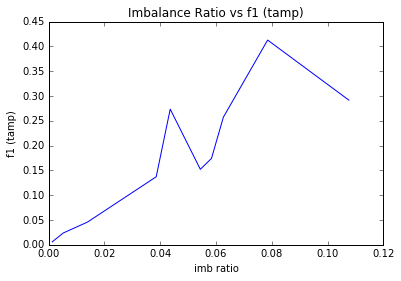

In [40]:
#myloc = df.loc[(df['File'] == '01_TANK_f') & (df['data']=='d_i_k_q_') & (df['balancing']=='-') & (df['classifier'] == 'NB')]
df1 = df.groupby(['File']).mean()
myloc = df1.sort_values(by=["imb ratio"], ascending=True)
print(myloc[['imb ratio', 'f1 (tamp)']])
print("\n\n")

plt.plot(myloc['imb ratio'], myloc['f1 (tamp)'])
plt.title("Imbalance Ratio vs f1 (tamp)")
plt.xlabel("imb ratio")
plt.ylabel("f1 (tamp)")

print("The least imbalanced file is {}".format(myloc['imb ratio'].idxmax()))
print("The most imbalanced file is {}".format(myloc['imb ratio'].idxmin()))
print("The *easiest* sequence is {}".format(myloc['f1 (tamp)'].idxmax()))
print("The *hardest* sequence is {}".format(myloc['f1 (tamp)'].idxmin()))



In [41]:
df['f1 (tamp)'].describe()

count    960.000000
mean       0.177448
std        0.154654
min        0.000000
25%        0.022525
50%        0.157307
75%        0.278437
max        0.648087
Name: f1 (tamp), dtype: float64

In [42]:
df2 = df.groupby(['balancing']).mean()
myloc = df2
print(myloc[['f1 (tamp)', 'f1 (auth)']])
print('\n')

assessThese = ['f1 (tamp)', 'f1 (auth)', 'total f1', 'accuracy']
assessTheseMeanings = ['minority class', 'majority class', 'both classes', 'accuracy']
for i, aThing in enumerate(assessThese):
    print("The best method of balancing for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmax()))
    print("The worst method of balancing for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmin()))






           f1 (tamp)  f1 (auth)
balancing                      
-           0.147760   0.919857
ro          0.190193   0.809977
ru          0.182948   0.793707
s           0.188889   0.813407


The best method of balancing for the minority class is ro
The worst method of balancing for the minority class is -
The best method of balancing for the majority class is -
The worst method of balancing for the majority class is ru
The best method of balancing for the both classes is -
The worst method of balancing for the both classes is ru
The best method of balancing for the accuracy is -
The worst method of balancing for the accuracy is ru


In [43]:
df3 = df.groupby(['classifier']).mean()
myloc = df3
print(myloc[['f1 (tamp)', 'f1 (auth)']])
print('\n')
assessThese = ['f1 (tamp)', 'f1 (auth)', 'total f1', 'accuracy']
assessTheseMeanings = ['minority class', 'majority class', 'both classes', 'accuracy']
for i, aThing in enumerate(assessThese):
    print("The best method of classifying for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmax()))
    print("The worst method of classifying for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmin()))





            f1 (tamp)  f1 (auth)
classifier                      
NB           0.147575   0.687539
dt           0.169907   0.863322
rf           0.201927   0.899418
svm          0.190382   0.886669


The best method of classifying for the minority class is rf
The worst method of classifying for the minority class is NB
The best method of classifying for the majority class is rf
The worst method of classifying for the majority class is NB
The best method of classifying for the both classes is rf
The worst method of classifying for the both classes is NB
The best method of classifying for the accuracy is rf
The worst method of classifying for the accuracy is NB


In [44]:
df4 = df.groupby(['data']).mean()
myloc = df4
print(myloc[['f1 (tamp)', 'f1 (auth)']])
print('\n')
assessThese = ['f1 (tamp)', 'f1 (auth)', 'total f1', 'accuracy']
assessTheseMeanings = ['minority class', 'majority class', 'both classes', 'accuracy']
for i, aThing in enumerate(assessThese):
    print("The best features for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmax()))
    print("The worst features for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmin()))

           f1 (tamp)  f1 (auth)
data                           
d_i_k_q_    0.193680   0.791107
d_i_k_q_b   0.185967   0.853614
d_q_        0.169974   0.771359
d_q_b       0.173956   0.838425
q_          0.185780   0.860773
q_b         0.155328   0.890144


The best features for the minority class is d_i_k_q_
The worst features for the minority class is q_b
The best features for the majority class is q_b
The worst features for the majority class is d_q_
The best features for the both classes is d_i_k_q_b
The worst features for the both classes is d_q_
The best features for the accuracy is q_b
The worst features for the accuracy is d_q_


In [97]:
fileFeatureList = []
headings = ['FileName', 'bestBalance(avg)', 'bestClass(avg)', 'bestFeat(avg)', 
            'bestBalance(max)', 'bestClass(max)', 'bestFeat(max)',]
fileFeatureList.append(headings)
bestBy = 'f1 mine'
resultDf = pd.DataFrame()
maxesOnly = pd.DataFrame()
minsOnly = pd.DataFrame()

for file in df['File'].unique():
#for file in ['01_TANK_f']:
    fileResults = []
    fileResults.append(file)
    mydf = df.loc[df['File'] == file]
    # Let the minority class be twice as important as the majority class...?
    assessThese = ['f1 (tamp)', 'f1 (auth)', 'total f1', 'f1 mine', 'accuracy']
    assessTheseMeanings = ['minority class', 'majority class', 'both classes', 'mine', 'accuracy']
    printThese = ['f1 (tamp)', 'f1 (auth)', 'f1 mine']
    sortedBy = 'f1 mine'

    
    print("For file {}:".format(file))
    df2 = mydf.groupby(['balancing']).mean()
    myloc = df2
    print(myloc[printThese].sort_values(by=[sortedBy], ascending=True))
    print('\n')
    fileResults.append(myloc['f1 mine'].idxmax())
    for i, aThing in enumerate(assessThese):
        print("The best method of balancing for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmax()))
        print("The worst method of balancing for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmin()))


    df3 = mydf.groupby(['classifier']).mean()
    myloc = df3
    print(myloc[printThese].sort_values(by=[sortedBy], ascending=True))
    print('\n')
    fileResults.append(myloc['f1 mine'].idxmax())
    for i, aThing in enumerate(assessThese):
        print("The best method of classifying for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmax()))
        print("The worst method of classifying for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmin()))

    df4 = mydf.groupby(['data']).mean()
    myloc = df4
    print(myloc[printThese].sort_values(by=[sortedBy], ascending=True))
    print('\n')
    fileResults.append(myloc['f1 mine'].idxmax())
    for i, aThing in enumerate(assessThese):
        print("The best features for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmax()))
        print("The worst features for the {} is {}".format(assessTheseMeanings[i], myloc[aThing].idxmin()))
        

    print('\n')
    
    
    # last, find this maximum (but average over stratifications)
    mydf = mydf
    df2 = mydf.groupby(['balancing'])
    bestBalance = df2['f1 mine'].idxmax().idxmax()
    fileResults.append(bestBalance)
    df3 = mydf.groupby(['classifier'])
    bestClassifier = df3['f1 mine'].idxmax().idxmax()
    fileResults.append(bestClassifier)
    df4 = mydf.groupby(['data'])
    bestData = df4['f1 mine'].idxmax().idxmax()
    fileResults.append(bestData)
    
    fileFeatureList.append(fileResults)
    
    overallAvg = df.loc[(df['File']==file) & 
                     (df['balancing']==fileResults[1]) & 
                     (df['classifier']==fileResults[2]) &
                     (df['data']==fileResults[3])
                    ]
    overallMax = df.loc[(df['File']==file) & 
                     (df['balancing']==fileResults[4]) & 
                     (df['classifier']==fileResults[5]) &
                     (df['data']==fileResults[6])
                    ]
    mydf = df.loc[df['File'] == file]
    overallMax2 = mydf.loc[[mydf['f1 mine'].idxmax()]]
    overallMin = mydf.loc[[mydf['f1 mine'].idxmin()]]

    
    resultDf = pd.concat([resultDf, overallAvg, overallMax, overallMax2], axis=0, join='outer', ignore_index=False)
    maxesOnly = pd.concat([maxesOnly, overallMax2])
    minsOnly = pd.concat([overallMin])



    
    print(fileResults)



For file 01_TANK_f:
           f1 (tamp)  f1 (auth)   f1 mine
balancing                                
-           0.040736   0.903638  0.985110
ru          0.186892   0.803028  1.176813
ro          0.189278   0.822257  1.200812
s           0.191957   0.827127  1.211041


The best method of balancing for the minority class is s
The worst method of balancing for the minority class is -
The best method of balancing for the majority class is -
The worst method of balancing for the majority class is ru
The best method of balancing for the both classes is s
The worst method of balancing for the both classes is -
The best method of balancing for the mine is s
The worst method of balancing for the mine is -
The best method of balancing for the accuracy is -
The worst method of balancing for the accuracy is ru
            f1 (tamp)  f1 (auth)   f1 mine
classifier                                
NB           0.107621   0.667168  0.882409
dt           0.152866   0.868704  1.174436
svm          

In [98]:
resultDf


,File,data,classifier,balancing,TN,FP,FN,TP,accuracy,total f1,imb ratio,f1 (auth),f1 (tamp),f1 mine
75,01_TANK_f,q_,rf,s,7954.75,1292.25,221.50,281.50,0.844744,1.186290,0.054396,0.913119,0.271097,1.455312
80,01_TANK_f,q_b,NB,-,9159.25,87.75,502.00,1.00,0.939513,0.971675,0.054396,0.968810,0.003380,0.975570
64,01_TANK_f,q_,NB,-,8890.25,356.75,338.00,165.00,0.928744,1.287490,0.054396,0.962396,0.322030,1.606455
98,02_MAN_f,d_i_k_q_,NB,ru,4440.50,976.50,153.00,430.00,0.811750,1.325936,0.107624,0.887168,0.432269,1.751707
176,02_MAN_f,q_b,NB,-,5032.75,384.25,503.75,79.25,0.852000,1.075444,0.107624,0.918930,0.151457,1.221844
128,02_MAN_f,d_q_,NB,-,5292.25,124.75,391.75,191.25,0.913917,1.382161,0.107624,0.953473,0.425473,1.804418
216,03_CAT_f,d_i_k_q_b,rf,-,7444.50,16.25,39.00,0.25,0.992633,1.001564,0.005261,0.996303,0.008969,1.014240
275,03_CAT_f,q_b,NB,s,5128.50,2332.25,12.25,27.00,0.687397,0.835550,0.005261,0.813951,0.022514,0.858979
217,03_CAT_f,d_i_k_q_b,rf,ro,7343.50,117.25,18.75,20.50,0.981865,1.429961,0.005261,0.990825,0.231638,1.454102
377,04_HELICOPTER_f,q_b,rf,ro,11026.50,3146.00,206.25,621.25,0.776516,1.137306,0.058388,0.868049,0.270417,1.408884


In [99]:
maxesOnly

,File,data,classifier,balancing,TN,FP,FN,TP,accuracy,total f1,imb ratio,f1 (auth),f1 (tamp),f1 mine
64,01_TANK_f,q_,NB,-,8890.25,356.75,338.00,165.00,0.928744,1.287490,0.054396,0.962396,0.322030,1.606455
128,02_MAN_f,d_q_,NB,-,5292.25,124.75,391.75,191.25,0.913917,1.382161,0.107624,0.953473,0.425473,1.804418
217,03_CAT_f,d_i_k_q_b,rf,ro,7343.50,117.25,18.75,20.50,0.981865,1.429961,0.005261,0.990825,0.231638,1.454102
312,04_HELICOPTER_f,d_i_k_q_b,rf,-,13332.25,840.25,350.50,477.00,0.920616,1.406782,0.058388,0.957252,0.444807,1.846866
408,05_HEN_f,d_i_k_q_b,rf,-,11343.25,211.00,311.50,134.25,0.956459,1.256839,0.038579,0.977487,0.339444,1.656375
507,06_LION_f,d_i_k_q_b,rf,s,6707.50,246.50,167.50,378.50,0.944800,1.620232,0.078516,0.970063,0.646456,2.262975
605,07_UFO_f,d_i_k_q_b,svm,ro,9493.50,243.75,7.50,5.25,0.974230,1.061329,0.001309,0.986940,0.040115,1.067169
680,08_TREE_f,d_i_k_q_,rf,-,8550.75,73.25,194.00,182.00,0.970306,1.556034,0.043599,0.984613,0.576634,2.137880
799,09_GIRL_f,d_i_k_q_b,svm,s,9147.50,1208.00,86.25,58.25,0.876730,1.043199,0.013954,0.933931,0.082580,1.099091
891,10_DOG_f,d_i_k_q_b,rf,s,11617.75,380.50,439.75,312.00,0.935666,1.402113,0.062655,0.965902,0.432058,1.830018


In [118]:
# So, the best selection is 'd_i_k_q_b', 'rf', '-', probabaly.
selection = df.loc[
             (df['balancing']=='ro') & 
             (df['classifier']=='rf') &
             (df['data']=='d_i_k_q_b')
            ]
selection

,File,data,classifier,balancing,TN,FP,FN,TP,accuracy,total f1,imb ratio,f1 (auth),f1 (tamp),f1 mine
25,01_TANK_f,d_i_k_q_b,rf,ro,8976.75,270.25,432.25,70.75,0.927949,1.123273,0.054396,0.962345,0.167654,1.297653
121,02_MAN_f,d_i_k_q_b,rf,ro,5175.50,241.50,520.75,62.25,0.872958,1.070357,0.107624,0.931411,0.140400,1.212211
217,03_CAT_f,d_i_k_q_b,rf,ro,7343.50,117.25,18.75,20.50,0.981865,1.429961,0.005261,0.990825,0.231638,1.454102
313,04_HELICOPTER_f,d_i_k_q_b,rf,ro,12479.50,1693.00,149.75,677.75,0.877148,1.384808,0.058388,0.931245,0.423826,1.778896
409,05_HEN_f,d_i_k_q_b,rf,ro,11217.00,337.25,293.50,152.25,0.947438,1.240451,0.038579,0.972653,0.325581,1.623816
505,06_LION_f,d_i_k_q_b,rf,ro,6572.25,381.75,101.25,444.75,0.935600,1.624855,0.078516,0.964557,0.648087,2.260732
601,07_UFO_f,d_i_k_q_b,rf,ro,9707.50,29.75,12.75,0.00,0.995641,0.997815,0.001309,0.997816,0.000000,0.997816
697,08_TREE_f,d_i_k_q_b,rf,ro,8299.00,325.00,221.50,154.50,0.939278,1.311983,0.043599,0.968124,0.361192,1.690508
793,09_GIRL_f,d_i_k_q_b,rf,ro,10303.50,52.00,139.50,5.00,0.981762,1.036084,0.013954,0.990793,0.049628,1.090048
889,10_DOG_f,d_i_k_q_b,rf,ro,11450.75,547.50,393.00,358.75,0.926234,1.405363,0.062655,0.960553,0.432750,1.826053


In [101]:
selection.sum(axis = 0, skipna = True)

File          01_TANK_f02_MAN_f03_CAT_f04_HELICOPTER_f05_HEN...
data          d_i_k_q_bd_i_k_q_bd_i_k_q_bd_i_k_q_bd_i_k_q_bd...
classifier                                 rfrfrfrfrfrfrfrfrfrf
balancing                                            ----------
TN                                                      93478.8
FP                                                      2041.75
FN                                                       2799.5
TP                                                         1430
accuracy                                                9.51194
total f1                                                12.1044
imb ratio                                              0.464281
f1 (auth)                                               9.74223
f1 (tamp)                                               2.45885
f1 mine                                                 14.6599
dtype: object

In [115]:
# So, the best selection is 'd_i_k_q_b', 'rf', '-', probabaly.
selection = df.loc[
             (df['balancing']=='ro') & 
             (df['classifier']=='rf') &
             (df['data']=='d_i_k_q_b')
            ]
selection
selection.sum(axis = 0, skipna = True)

File          01_TANK_f02_MAN_f03_CAT_f04_HELICOPTER_f05_HEN...
data          d_i_k_q_bd_i_k_q_bd_i_k_q_bd_i_k_q_bd_i_k_q_bd...
classifier                                 rfrfrfrfrfrfrfrfrfrf
balancing                                  rorororororororororo
TN                                                      91525.2
FP                                                      3995.25
FN                                                         2283
TP                                                       1946.5
accuracy                                                9.38587
total f1                                                12.6249
imb ratio                                              0.464281
f1 (auth)                                               9.67032
f1 (tamp)                                               2.78076
f1 mine                                                 15.2318
dtype: object

So, for key frame analysis, the best combination seems to be random forest classifier with random oversampling, and all the data that we have. Even then, the number of false positives and false negatives is quite substantial.